# Let's try a multiclass problem without transfer learning


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [9]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

r = zipfile.ZipFile("10_food_classes_all_data.zip","r")
r.extractall()
r.close()


--2023-08-19 11:27:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 74.125.124.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  53.9MB/s    in 6.8s    

2023-08-19 11:27:31 (73.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
!ls

10_food_classes_all_data  10_food_classes_all_data.zip	__MACOSX  sample_data


In [18]:
import os

for path, dir , filename in os.walk("10_food_classes_all_data"):
  print(f"{len(dir)} dir ---> {len(filename)} imgs at {path}")

2 dir ---> 0 imgs at 10_food_classes_all_data
10 dir ---> 0 imgs at 10_food_classes_all_data/train
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_wings
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ice_cream
0 dir ---> 750 imgs at 10_food_classes_all_data/train/sushi
0 dir ---> 750 imgs at 10_food_classes_all_data/train/pizza
0 dir ---> 750 imgs at 10_food_classes_all_data/train/steak
0 dir ---> 750 imgs at 10_food_classes_all_data/train/fried_rice
0 dir ---> 750 imgs at 10_food_classes_all_data/train/chicken_curry
0 dir ---> 750 imgs at 10_food_classes_all_data/train/ramen
0 dir ---> 750 imgs at 10_food_classes_all_data/train/grilled_salmon
0 dir ---> 750 imgs at 10_food_classes_all_data/train/hamburger
10 dir ---> 0 imgs at 10_food_classes_all_data/test
0 dir ---> 250 imgs at 10_food_classes_all_data/test/chicken_wings
0 dir ---> 250 imgs at 10_food_classes_all_data/test/ice_cream
0 dir ---> 250 imgs at 10_food_classes_all_data/test/sushi
0 dir ---> 250 imgs at

In [20]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [28]:
# Extract class names
import numpy as np
class_names = np.array(sorted([j for j in os.listdir(train_dir)]))

In [29]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [61]:
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

In [68]:

def viewData(train_dir=train_dir):
  plt.figure(figsize=(5,5))
  class_names  = [j for j in os.listdir(train_dir)]
  choice = rd.randint(0, len(class_names))
  path_ = train_dir + "/" + class_names[choice]
  files =[ j for j in os.listdir(path_)]
  choice = rd.randint(0, len(files))
  path_ += "/" + files[choice]
  img = mimg.imread(path_)
  plt.title(path_, fontsize=10)
  plt.imshow(img)

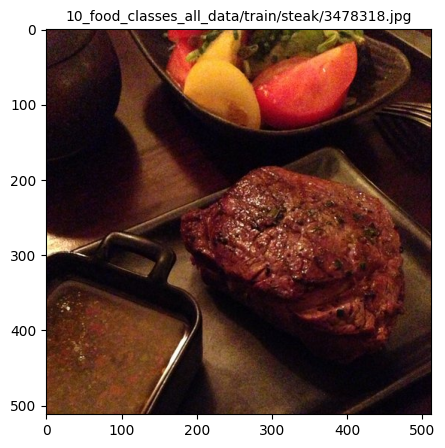

In [69]:
viewData(train_dir)

**Normalizing and shuffling the data**

In [72]:
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.)

In [80]:
train_data = test_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              classes=None ,
                                              shuffle=True,
                                              seed=42,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             classes=None,
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model Creation

In [91]:
tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


# Model Compilation

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

# Model Fitting
history1 = model1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data=test_data,
           validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 125ms/step - loss: 2.2283 - accuracy: 0.1507 - val_loss: 2.1120 - val_accuracy: 0.1860
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 2.1240 - accuracy: 0.2095 - val_loss: 2.1235 - val_accuracy: 0.2232
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 2.0818 - accuracy: 0.2285 - val_loss: 2.0788 - val_accuracy: 0.2412
Epoch 4/5
235/235 [==============================] - 28s 121ms/step - loss: 2.0441 - accuracy: 0.2524 - val_loss: 2.0500 - val_accuracy: 0.2504
Epoch 5/5
235/235 [==============================] - 30s 126ms/step - loss: 2.0221 - accuracy: 0.2699 - val_loss: 1.9755 - val_accuracy: 0.2828


In [92]:
import pandas as pd

<Axes: >

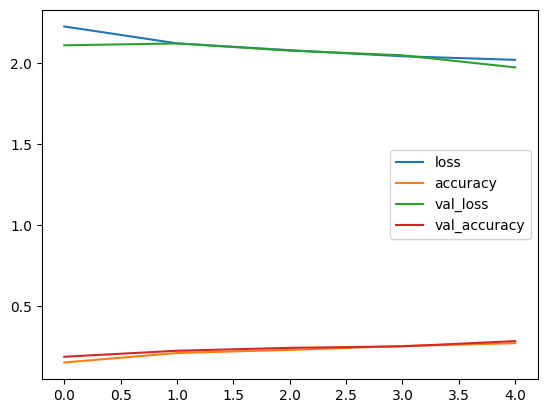

In [93]:
pd.DataFrame(history1.history).plot()


In [98]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.legend()


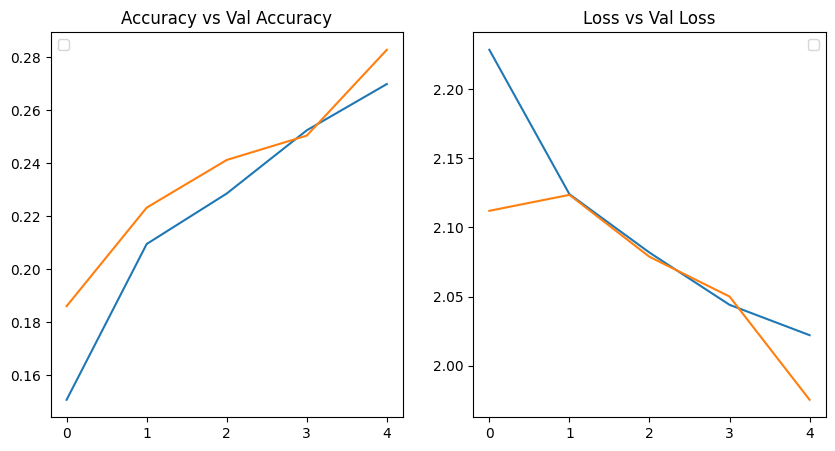

In [99]:
plot_the_graph(history1)

In [102]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_91 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_93 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 